In [1]:
import os
import model_generator as mg
inIter = '5'

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
model = mg.Model([300, 400, 40, 1], 'Model_2-2', 
                 dataFilename = 'Model_2-2/T_'+inIter+'.h5', 
                 paramFileName = 'Model_2-2/params_Model_2-2_'+inIter+'.pkl', r_discount=.95, c_discount=1)
mg.saveHP(model)
model.setData()

num minibatches:1478
	Epoch time:21 seconds
Cost after epoch 0: 0.781623
	Dev error (no dropout): 0.753102
Cost after epoch 1: 0.766287
	Dev error (no dropout): 0.750977
Cost after epoch 2: 0.761817
	Dev error (no dropout): 0.746699
Cost after epoch 3: 0.757837
	Dev error (no dropout): 0.743693
Cost after epoch 4: 0.755577
	Dev error (no dropout): 0.745927
Cost after epoch 5: 0.752423
	Dev error (no dropout): 0.740110
Cost after epoch 6: 0.750006
	Dev error (no dropout): 0.741529
Cost after epoch 7: 0.747909
	Dev error (no dropout): 0.740492
Cost after epoch 8: 0.745609
	Dev error (no dropout): 0.738420
Cost after epoch 9: 0.744677
	Dev error (no dropout): 0.735172
	Ave epoch time: 20.993242
	100 epochs will take 0:34:59.324198
Cost after epoch 10: 0.742669
	Dev error (no dropout): 0.737610
Cost after epoch 20: 0.730490
	Dev error (no dropout): 0.731463
Parameters have been trained!


InternalError: Dst tensor is not initialized.
	 [[Node: _arg_Placeholder_2_0_0/_91 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device_incarnation=1, tensor_name="edge_278__arg_Placeholder_2_0_0", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

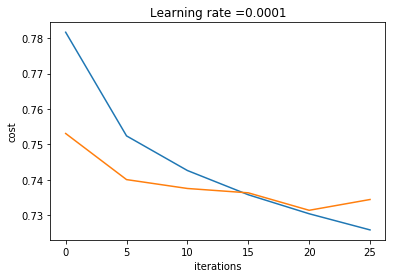

In [3]:
model.TrainModel(num_epochs=30, minibatch_size=2048, learning_rate=0.0001)

In [6]:
os.system('git add .')
os.system('git commit -m "Model_2-2_'+str(model.modelIter)+' trained"')
os.system('git pull')
os.system('git push origin master')

0

In [5]:
model.TestModel(1000)

VS Greedy: 62.300%	VS Random: 94.200%
Standard metric: 218.66


In [ ]:
model.TestModel(20000)

In [2]:
import zsyMultigame as multi
import os
outIter = '6'
multi.simulate('Model_2-2/params_Model_2-2_'+outIter+'.pkl', os.path.join('Model_2-2','T_'+outIter+'_exp15.h5'),
               numGames=100000, poolsize = 20, exploration_prob = 0.15)


 X_A shape:(300, 1605787)


Process ForkPoolWorker-28:
Process ForkPoolWorker-32:
Process ForkPoolWorker-38:
Process ForkPoolWorker-40:
Process ForkPoolWorker-27:
Process ForkPoolWorker-24:
Process ForkPoolWorker-31:
Process ForkPoolWorker-26:
Process ForkPoolWorker-39:
Process ForkPoolWorker-22:
Process ForkPoolWorker-21:
Process ForkPoolWorker-36:
Process ForkPoolWorker-30:
Process ForkPoolWorker-35:
Process ForkPoolWorker-29:
Process ForkPoolWorker-25:
Process ForkPoolWorker-34:
Process ForkPoolWorker-33:
Process ForkPoolWorker-37:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-23:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Trace

  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108,

In [3]:
multi.simulate('Model_2-2/params_Model_2-2_'+outIter+'.pkl', os.path.join('Model_2-2','T_'+outIter+'_exp10.h5'),
               numGames=100000, poolsize = 20, exploration_prob = 0.10)
multi.simulate('Model_2-2/params_Model_2-2_'+outIter+'.pkl', os.path.join('Model_2-2','T_'+outIter+'_exp05.h5'),
               numGames=100000, poolsize = 20, exploration_prob = 0.05)
multi.simulate('Model_2-2/params_Model_2-2_'+outIter+'.pkl', os.path.join('Model_2-2','T_'+outIter+'_exp00.h5'),
               numGames=100000, poolsize = 20, exploration_prob = 0.0)


 X_A shape:(300, 1615232)

 X_A shape:(300, 1624470)

 X_A shape:(300, 1637377)


Process ForkPoolWorker-75:
Process ForkPoolWorker-44:
Process ForkPoolWorker-86:
Process ForkPoolWorker-73:
Process ForkPoolWorker-79:
Process ForkPoolWorker-74:
Process ForkPoolWorker-78:
Process ForkPoolWorker-93:
Process ForkPoolWorker-76:
Process ForkPoolWorker-71:
Process ForkPoolWorker-67:
Process ForkPoolWorker-96:
Process ForkPoolWorker-89:
Process ForkPoolWorker-97:
Process ForkPoolWorker-77:
Process ForkPoolWorker-99:
Process ForkPoolWorker-95:
Process ForkPoolWorker-84:
Process ForkPoolWorker-43:
Process ForkPoolWorker-88:
Process ForkPoolWorker-87:
Process ForkPoolWorker-62:
Process ForkPoolWorker-56:
Process ForkPoolWorker-100:
Process ForkPoolWorker-98:
Process ForkPoolWorker-82:
Process ForkPoolWorker-42:
Process ForkPoolWorker-69:
Process ForkPoolWorker-45:
Process ForkPoolWorker-72:
Process ForkPoolWorker-91:
Process ForkPoolWorker-54:
Process ForkPoolWorker-70:
Process ForkPoolWorker-46:
Process ForkPoolWorker-52:
Process ForkPoolWorker-68:
Process ForkPoolWorker-61:


Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()

  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 93, in run


  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p

  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing

  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/multiprocessing/synchronize.p

In [4]:
os.system('git add .')
os.system('git commit -m "Model_2-2_'+outIter+' simulated"')
os.system('git pull')
os.system('git push origin master')

2